<a href="https://colab.research.google.com/github/melhamdani/-Stamp-Prices/blob/main/copy_of_project_2_housing_price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project-2: **Housing Price Prediction**

#*Deep Dive Coding Data Science Bootcamp Project*

# Problem Definition




   **1.** The business problem involves predicting housing prices to assist homeowners, buyers, and real estate agents in making informed decisions. The project can help save time and improve the decision-making process by providing accurate price predictions.

---
            

**2 .** This is a supervised learning problem because we already know the house prices (labeled data) and want to predict them based on other features.

---

---
**3. supervised**

The target is the house SalePrice—this is what we are trying to predict.
What type of data is the target: numerical or categorical?

The target, SalePrice, is a numerical value (a number).
Is this a classification or regression problem?

This is a regression problem because we’re predicting a continuous number (the house price).

---

A data dictionary file is available at AWS S3 at Housing Data Dictionary.

# Data Collection/Sources


**16 Libraries loaded for**  

*   **Pandas:** Data manipulation.
*   **Numpy:** Scientific computing.
*   **matplotlib.pyplot:** Data visualization.
*   **sklearn:** Machine Learning.
*   **statsmodels.api:** Statistical modeling, Linear Regression.
*   **seaborn:** Statistical graphics.

##*Imports*

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

import statsmodels.api as sm

from IPython.display import IFrame

*   **Data loaded from AWS S3: Housing.Data.csv**
*  **CSV file read into a Pandas DataFrame in Python**
*   **Assigned Dataframe variable: housing_data**
*   **This code sets up the locations of the files containing the data**

In [7]:
#Pull file for data exploration by reading into Pandas DataFrame and assign its variable.

url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'

housing_data= pd.read_csv(url)


**DATA DICTIONARY includes:**
*   Source of dataset
*   Number and definition of variables
*   Variable types and formats

In [8]:
import pandas as pd

# Load the dataset
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
housing_data = pd.read_csv(url)




In [9]:
# Check the first few rows to understand the structure
housing_data.head()

# Check the size of the data (rows and columns)
housing_data.shape

(2637, 81)

# Data Cleaning


In [10]:
housing_data.head()


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [11]:
housing_data.tail()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000
2636,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000


In [12]:

housing_data.shape

(2637, 81)

There are 81 columns in the dataset.

In [13]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [14]:
housing_data.describe()


,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.637000e+03,2637.000000,2188.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2614.000000,2636.000000,...,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000
mean,7.141301e+08,57.349261,69.166819,10044.694729,6.097459,5.569966,1971.288586,1984.202882,101.887911,438.441199,...,94.305271,46.984452,22.813424,2.368601,15.775123,2.130072,42.014031,6.243838,2007.795601,179986.230186
std,1.887527e+08,42.499091,23.356779,6742.549521,1.411522,1.118262,30.306986,20.913077,179.578232,449.602326,...,126.927272,66.564333,61.177638,23.160600,55.783751,35.140140,393.158781,2.722093,1.306403,78309.251522
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7436.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354530e+08,50.000000,68.000000,9450.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071870e+08,70.000000,80.000000,11526.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,732.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000
max,1.007100e+09,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,584.000000,407.000000,576.000000,800.000000,12500.000000,12.000000,2010.000000,745000.000000


In [15]:
type(housing_data)

pandas.core.frame.DataFrame

In [16]:

housing_data.nunique().sort_values()

,0
Street,2
Alley,2
Central Air,2
Paved Drive,3
Garage Finish,3
...,...
1st Flr SF,1022
Bsmt Unf SF,1080
Gr Liv Area,1216
Lot Area,1799


In [17]:

housing_data.duplicated().sum()

0

Zero duplicates in dataset

In [18]:
housing_data.dtypes.value_counts()

,count
object,43
int64,27
float64,11


In [19]:
print(housing_data.columns)


Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [20]:
housing_data.isnull().sum()

,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,449
Lot Area,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [21]:
house_df= housing_data.copy()

### Modified - RWC

#### Dropping null columns

In [22]:
null_counts = house_df.isna().sum()
null_counts

,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,449
Lot Area,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [23]:
filter = ( null_counts > 0 )
filter

,0
PID,False
MS SubClass,False
MS Zoning,False
Lot Frontage,True
Lot Area,False
...,...
Mo Sold,False
Yr Sold,False
Sale Type,False
Sale Condition,False


In [24]:
nulls_freq = ( null_counts[ filter ].sort_values( ascending=False) / len(house_df) * 100 )
nulls_freq

,0
Pool QC,99.582859
Misc Feature,96.359499
Alley,93.174061
Fence,79.977247
Mas Vnr Type,60.940463
Fireplace Qu,48.691695
Lot Frontage,17.026925
Garage Yr Blt,5.574516
Garage Cond,5.574516
Garage Qual,5.574516


In [25]:
filter = ( nulls_freq > 15 )
drop_null_cols = nulls_freq[ filter ].index
drop_null_cols

Index(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Mas Vnr Type',
       'Fireplace Qu', 'Lot Frontage'],
      dtype='object')

In [26]:
house_df.drop( columns = drop_null_cols, inplace = True )

In [27]:
house_df.shape


(2637, 74)

In [28]:
house_df.head()

,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,14299,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2007,WD,Normal,115400
1,905101330,90,RL,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,10,2006,WD,Normal,90000
2,903454090,50,RM,9000,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,126,0,0,12,2007,WD,Normal,141000
3,533244030,60,FV,7379,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,254000
4,909252020,70,RL,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2009,WD,Normal,155000


In [29]:
# Restore from original
house_df = housing_data.copy()

In [30]:
house_df.shape

(2637, 81)

In [31]:
# Drop all columns that have even one null
house_df.dropna( axis='columns').shape


(2637, 55)

#### Work only with float columns

In [32]:
#
house_df_floats = house_df.select_dtypes( include = ['float'])
house_df_floats.shape

(2637, 11)

In [33]:
house_df_floats = house_df_floats.join( house_df['SalePrice'] )
house_df_floats.shape

(2637, 12)

In [34]:
house_df_floats = house_df_floats.dropna()
house_df_floats.shape

(2033, 12)

In [35]:
house_df_floats.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
0,62.0,0.0,513.0,144.0,348.0,1005.0,1.0,0.0,1964.0,2.0,440.0,115400
1,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,2.0,516.0,90000
2,50.0,0.0,0.0,0.0,780.0,780.0,0.0,0.0,1979.0,1.0,544.0,141000
3,68.0,0.0,484.0,0.0,491.0,975.0,1.0,0.0,2000.0,2.0,592.0,254000
4,60.0,0.0,350.0,210.0,0.0,560.0,1.0,0.0,1971.0,2.0,576.0,155000


### Modifed - done - RWC

In [36]:
print(housing_data.isnull().sum())

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      449
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64


In [37]:
housing_data.shape

(2637, 81)

In [38]:
duplicates = housing_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any exist
housing_data.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [39]:
# Check for missing values in the dataset
missing_values = housing_data.isnull().sum()
missing_values


,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,449
Lot Area,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [40]:
# house_df.isnull().sum().sort_values(ascending=False)
missing_values= house_df.isna().sum()
missing_values
# sorted_columns= missing_values.sort_values(ascending=False).index
# sorted_df = house_df[sorted_columns]
# sorted_df
missing_columns= missing_values[missing_values >0]
missing_columns.sort_values(ascending=False)


,0
Pool QC,2626
Misc Feature,2541
Alley,2457
Fence,2109
Mas Vnr Type,1607
Fireplace Qu,1284
Lot Frontage,449
Garage Yr Blt,147
Garage Cond,147
Garage Qual,147


In [41]:
missing_columns.count()

26

In [42]:
# nulls_per_row = house_df.isnull().sum(axis=1)
# nulls_per_row

rows_with_missing_values= house_df[house_df.isnull().any(axis=1)]

rows_with_missing_values

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000


In [43]:
# Return series of duplicated rows by 'PID' column

duplicate_rows = house_df['PID'].duplicated(keep=False)
duplicate_rows

,PID
0,False
1,False
2,False
3,False
4,False
...,...
2632,False
2633,False
2634,False
2635,False


In [44]:
# Filter df copy to select rows where 'PID' is duplicated
duplicated_data= house_df[duplicate_rows]


In [45]:
# Display duplicated rows
duplicated_data

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [46]:
housing_data.shape


(2637, 81)

In [47]:
# solution 3
housing_data['PID'].nunique() == housing_data.shape[0]


True

The PID column can serve as a unique identifier since it likely contains unique values for each row. There’s no need to handle them unless duplicates are found.

In [48]:
# train_data.hist(figsize=(15,10))

linear regession()

In [49]:
house_df.drop('PID', axis=1, inplace= True)

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2637 non-null   int64  
 1   MS Zoning        2637 non-null   object 
 2   Lot Frontage     2188 non-null   float64
 3   Lot Area         2637 non-null   int64  
 4   Street           2637 non-null   object 
 5   Alley            180 non-null    object 
 6   Lot Shape        2637 non-null   object 
 7   Land Contour     2637 non-null   object 
 8   Utilities        2637 non-null   object 
 9   Lot Config       2637 non-null   object 
 10  Land Slope       2637 non-null   object 
 11  Neighborhood     2637 non-null   object 
 12  Condition 1      2637 non-null   object 
 13  Condition 2      2637 non-null   object 
 14  Bldg Type        2637 non-null   object 
 15  House Style      2637 non-null   object 
 16  Overall Qual     2637 non-null   int64  
 17  Overall Cond  

In [50]:
#housing_data.fillna(housing_data.mean(), inplace=True)

numeric_cols = housing_data.select_dtypes(include=['float', 'int']).columns

housing_data[numeric_cols] = housing_data[numeric_cols].fillna(housing_data[numeric_cols].mean())


In [51]:
housing_data['Lot Frontage'].fillna(housing_data['Lot Frontage'].median(), inplace=True)


<ipython-input-51-6069fe591d61>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data['Lot Frontage'].fillna(housing_data['Lot Frontage'].median(), inplace=True)


In [52]:
housing_data.dropna(inplace=True)


In [53]:
housing_data['MS SubClass'] = housing_data['MS SubClass'].astype(int)


In [54]:
housing_data = pd.get_dummies(housing_data, drop_first=True)


In [55]:
housing_data.fillna(housing_data.mean(), inplace=True)


#**Data Processing**

#linear regression

In [56]:
# Define X (features) and y (target)
X = house_df_floats.drop(columns=['SalePrice'])
y = house_df_floats['SalePrice']



In [57]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2218229533.68736
R^2 Score: 0.6989576928258895


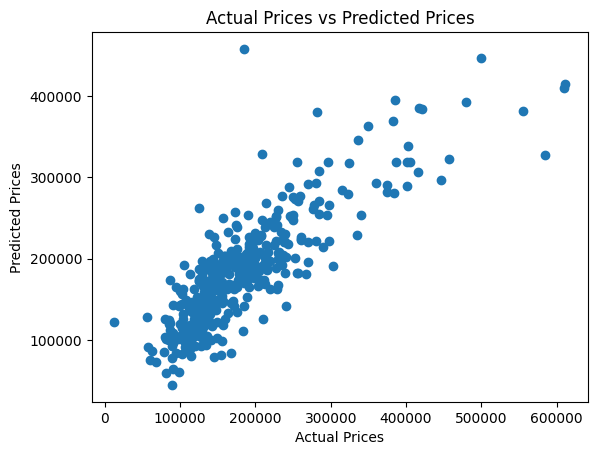

In [60]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


In [61]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")



Root Mean Squared Error: 47098.08418277075


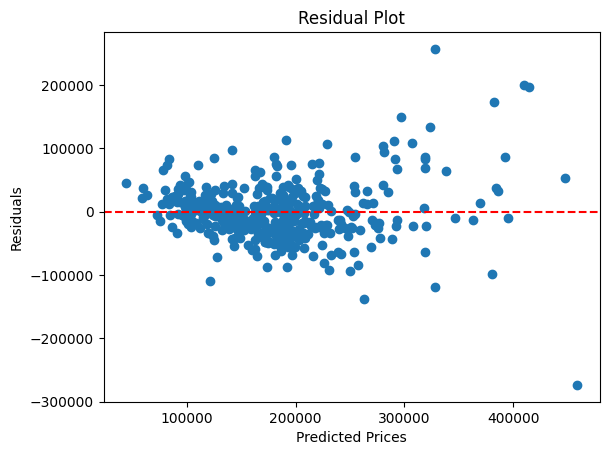

In [62]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [63]:
from sklearn.linear_model import Ridge, Lasso

# Ridge regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print(f"Ridge Regression RMSE: {ridge_rmse}")

# Lasso regression (L1 regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print(f"Lasso Regression RMSE: {lasso_rmse}")


Ridge Regression RMSE: 47330.243322618735
Lasso Regression RMSE: 47330.536799542446


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
scaled_pred = model.predict(X_test_scaled)


###cross-visualition

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"Cross-Validation RMSE: {rmse_scores.mean()}")


Cross-Validation RMSE: 48693.460351096655


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize Ridge regression
ridge_model = Ridge()

# Perform grid search
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best RMSE: {np.sqrt(-grid_search.best_score_)}")


Best alpha: 10
Best RMSE: 49000.37252782319


In [67]:
# today


In [68]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest RMSE: {rf_rmse}")


Random Forest RMSE: 42132.92492716361


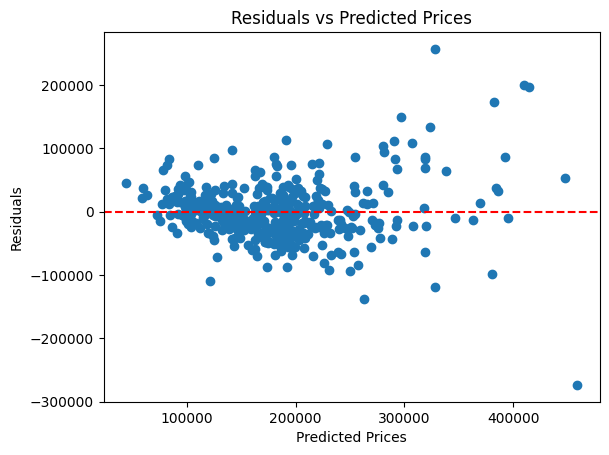

In [69]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()


In [70]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                 Coefficient
Lot Frontage     6305.785233
Mas Vnr Area    15802.086029
BsmtFin SF 1    11795.053779
BsmtFin SF 2      585.003805
Bsmt Unf SF      4691.242949
Total Bsmt SF   17640.815637
Bsmt Full Bath   1497.313236
Bsmt Half Bath  -2296.893616
Garage Yr Blt   14275.448249
Garage Cars     24712.195457
Garage Area      -150.124132


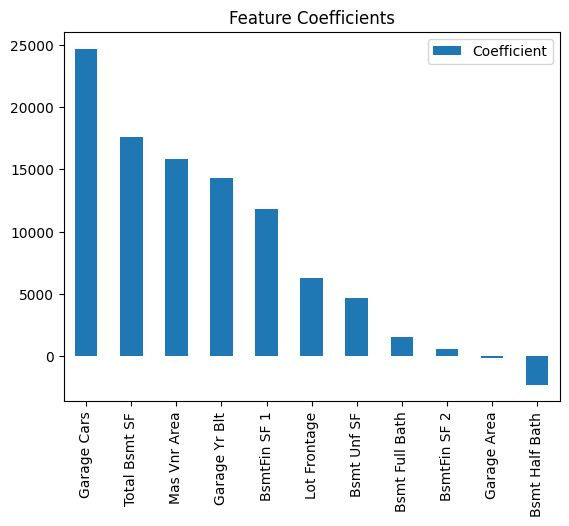

In [71]:
coefficients.sort_values(by='Coefficient', ascending=False).plot(kind='bar')
plt.title('Feature Coefficients')
plt.show()


In [72]:
from sklearn.linear_model import Ridge, Lasso
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Evaluate both models
print('Ridge Model Score:', ridge_model.score(X_test, y_test))
print('Lasso Model Score:', lasso_model.score(X_test, y_test))


Ridge Model Score: 0.6959825409937141
Lasso Model Score: 0.6959787707876481


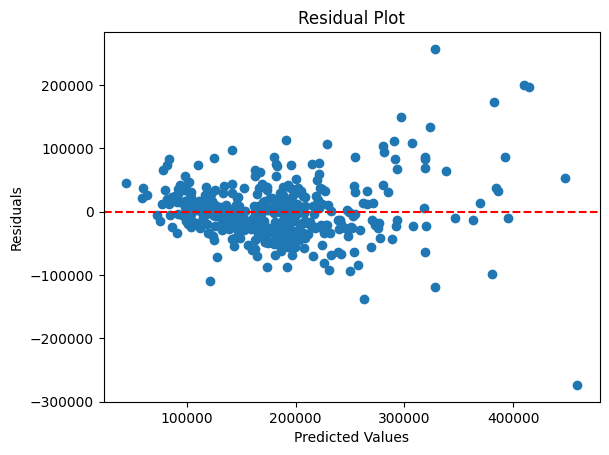

In [73]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


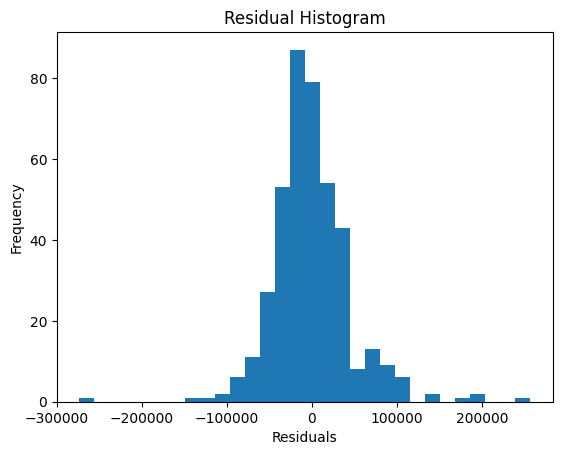

In [74]:
plt.hist(residuals, bins=30)
plt.title('Residual Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [75]:
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)


                 Coefficient
Garage Cars     24712.195457
Total Bsmt SF   17640.815637
Mas Vnr Area    15802.086029
Garage Yr Blt   14275.448249
BsmtFin SF 1    11795.053779
Lot Frontage     6305.785233
Bsmt Unf SF      4691.242949
Bsmt Full Bath   1497.313236
BsmtFin SF 2      585.003805
Garage Area      -150.124132
Bsmt Half Bath  -2296.893616


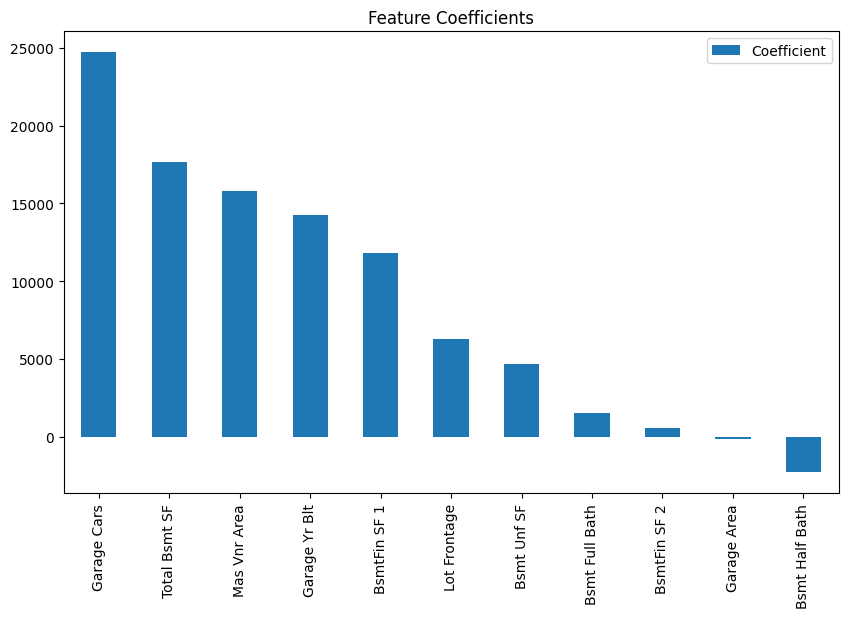

In [76]:
coef_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Coefficients')
plt.show()


In [77]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge Model R^2:", ridge.score(X_test, y_test))


Ridge Model R^2: 0.6959825409937141


In [78]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso Model R^2:", lasso.score(X_test, y_test))


Lasso Model R^2: 0.6959787707876481


In [79]:
print("Length of X:", len(X))
print("Length of y:", len(y))


Length of X: 2033
Length of y: 2033


In [80]:
X = house_df_floats.drop(['SalePrice'], axis=1)  # or the appropriate DataFrame with your features
y = house_df_floats['SalePrice']  # Ensure 'SalePrice' is the correct target column


In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("Cross-validated RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())


Cross-validated RMSE Scores: [45685.54107611 42902.12588039 45687.78550153 58283.86919694
 50907.98010051]
Mean RMSE: 48693.460351096655


In [82]:
print("Cross-validated RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())


Cross-validated RMSE Scores: [45685.54107611 42902.12588039 45687.78550153 58283.86919694
 50907.98010051]
Mean RMSE: 48693.460351096655
Standard Deviation of RMSE: 5449.7936505638945


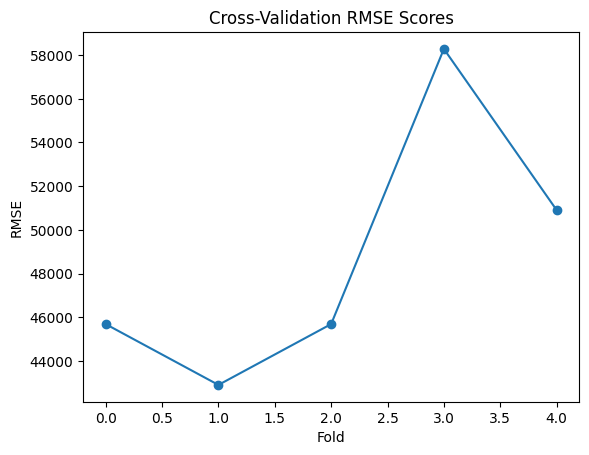

In [83]:
plt.plot(rmse_scores, marker='o')
plt.title('Cross-Validation RMSE Scores')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.show()


In [84]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_rmse = np.sqrt(-cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')).mean()
print('Ridge RMSE:', ridge_rmse)


Ridge RMSE: 48703.511572692456


In [85]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values for Lasso
lasso = Lasso()
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(lasso, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

print("Best alpha for Lasso:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))


Best alpha for Lasso: {'alpha': 100}
Best RMSE: 48981.585109539556


In [86]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values for Lasso
lasso = Lasso()
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(lasso, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

print("Best alpha for Lasso:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))




Best alpha for Lasso: {'alpha': 100}
Best RMSE: 48981.585109539556


In [87]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model_poly = LinearRegression()
model_poly.fit(X_poly, y)


LinearRegression()

In [88]:
# Extract the best alpha from the GridSearchCV result
optimal_alpha = grid_search.best_params_['alpha']

# Now use optimal_alpha in your final Lasso model
final_model = Lasso(alpha=optimal_alpha)
final_model.fit(X_train, y_train)

# Predict and evaluate the model on test data
y_pred = final_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Final RMSE on test set: {final_rmse}")


Final RMSE on test set: 47326.31907413094


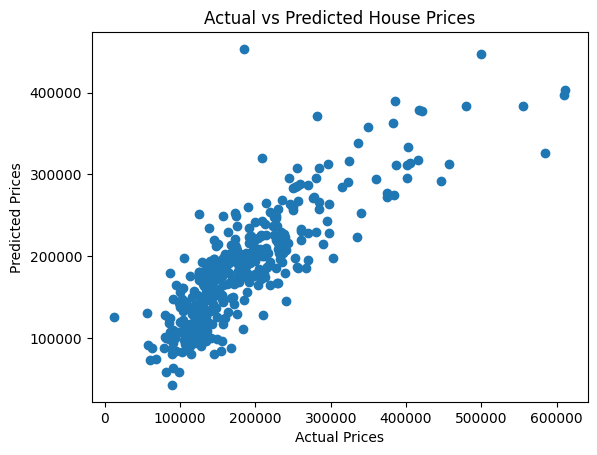

In [89]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [90]:
# stp

In [91]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest RMSE: {rf_rmse}")


Random Forest RMSE: 42132.92492716361


In [92]:

# Predict on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [93]:
housing_data.dropna(inplace=True)  # Drop rows with missing values


### Modified - RWC

In [94]:
house_df_floats.shape

(2033, 12)

In [95]:
X = house_df_floats.drop(['SalePrice'], axis=1)
y = house_df_floats['SalePrice']


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
model = LinearRegression()


In [98]:
model.fit(X_train, y_train)  # Fit the model on the training data


LinearRegression()

In [99]:
y_pred = model.predict(X_test)  # Make predictions on the test set


In [100]:
rmse = root_mean_squared_error( y_test, y_pred )  # Calculate Mean Squared Error


In [101]:
print(f"Mean Squared Error: {rmse}")


Mean Squared Error: 47098.08418277075


#### Calculate RMSPE



### Modified - RWC

In [102]:
# X =  housing_data_encoded.drop(['SalePrice'], axis=1)
# y = housing_data_encoded['SalePrice']


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
y_pred = model.predict(X_test)


In [105]:
model.fit(X_train_scaled, y_train)  # Fit the model on the training data
y_pred = model.predict(X_test_scaled)  # Make predictions on the test set
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2240180457.148065


In [106]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {rmse}")


Mean Squared Error: 47330.5446529835


#### Calculate RMSPE

In [107]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

# Calculate RMSPE
rmspe_value = rmspe(y_test, y_pred)
print("Root Mean Square Percentage Error: {:.2f}".format(rmspe_value))


Root Mean Square Percentage Error: 50.80


In [108]:
# Function to calculate RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

# Calculate RMSPE
rmspe_value = rmspe(y_test, y_pred)
print(f"Root Mean Square Percentage Error: {rmspe_value}")


Root Mean Square Percentage Error: 0.5080123406025097


In [109]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Root Mean Square Percentage Error (RMSPE): {:.2f}%".format(rmspe_value))


Mean Squared Error (MSE): 2240180457.148065
Root Mean Squared Error (RMSE): 47330.5446529835
Root Mean Square Percentage Error (RMSPE): 0.51%


In [110]:
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)


                 Coefficient
Garage Cars     24712.195457
Total Bsmt SF   17640.815637
Mas Vnr Area    15802.086029
Garage Yr Blt   14275.448249
BsmtFin SF 1    11795.053779
Lot Frontage     6305.785233
Bsmt Unf SF      4691.242949
Bsmt Full Bath   1497.313236
BsmtFin SF 2      585.003805
Garage Area      -150.124132
Bsmt Half Bath  -2296.893616


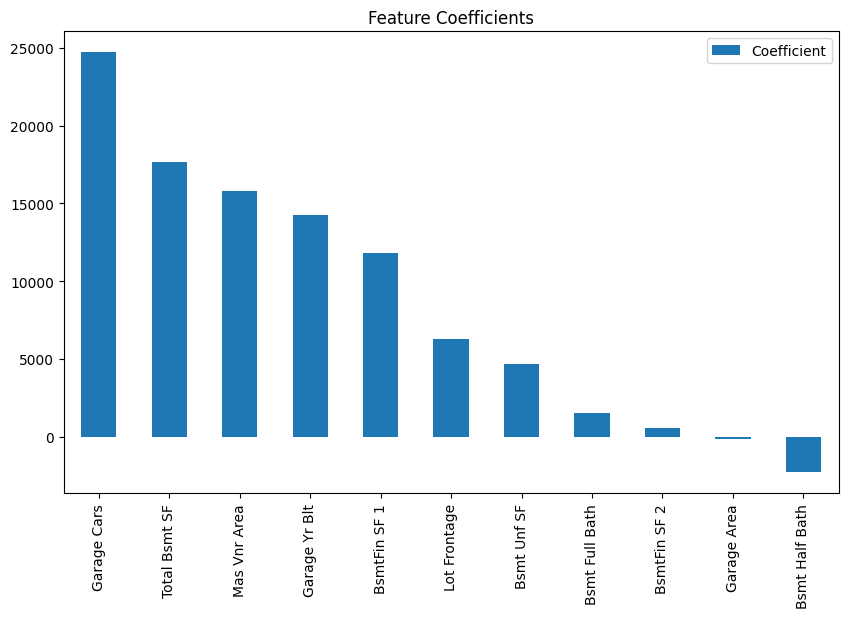

In [111]:
coef_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Coefficients')
plt.show()

In [112]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test)))
print('Lasso RMSE:', lasso_rmse)


Lasso RMSE: 47330.536799542446


In [113]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test)))
print('Ridge RMSE:', ridge_rmse)


Ridge RMSE: 47330.243322618735


In [114]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

print("Best alpha for Lasso:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))


Best alpha for Lasso: {'alpha': 100}
Best RMSE: 48981.585109539556


In [115]:
# Extract the best alpha value from the grid search
optimal_alpha = grid_search.best_params_['alpha']

# Now use this alpha value in your final Lasso model
final_model = Lasso(alpha=optimal_alpha)
final_model.fit(X_train, y_train)

# Predict on the test set
y_pred_final = final_model.predict(X_test)

# Calculate RMSE
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
print("Final RMSE on Test Set:", final_rmse)


Final RMSE on Test Set: 47326.31907413094


In [116]:
# X['LotArea_log'] = np.log1p(X['Lot Area'])

In [117]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"Cross-Validation RMSE: {rmse_scores.mean()}")


Cross-Validation RMSE: 48693.460351096655


In [118]:
# Ensure no NaNs are left
housing_data.fillna(housing_data.mean(), inplace=True)  # for numerical columns
housing_data.dropna(inplace=True)  # drop rows with NaN values, if necessary

# Verify if NaN values are still present
print(housing_data.isnull().sum())


PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64


In [119]:
housing_data.fillna(housing_data.mean(), inplace=True)  # for numerical columns


In [120]:

X = housing_data.drop('SalePrice', axis=1)
y = housing_data['SalePrice']

# Exploratory Data Analysis


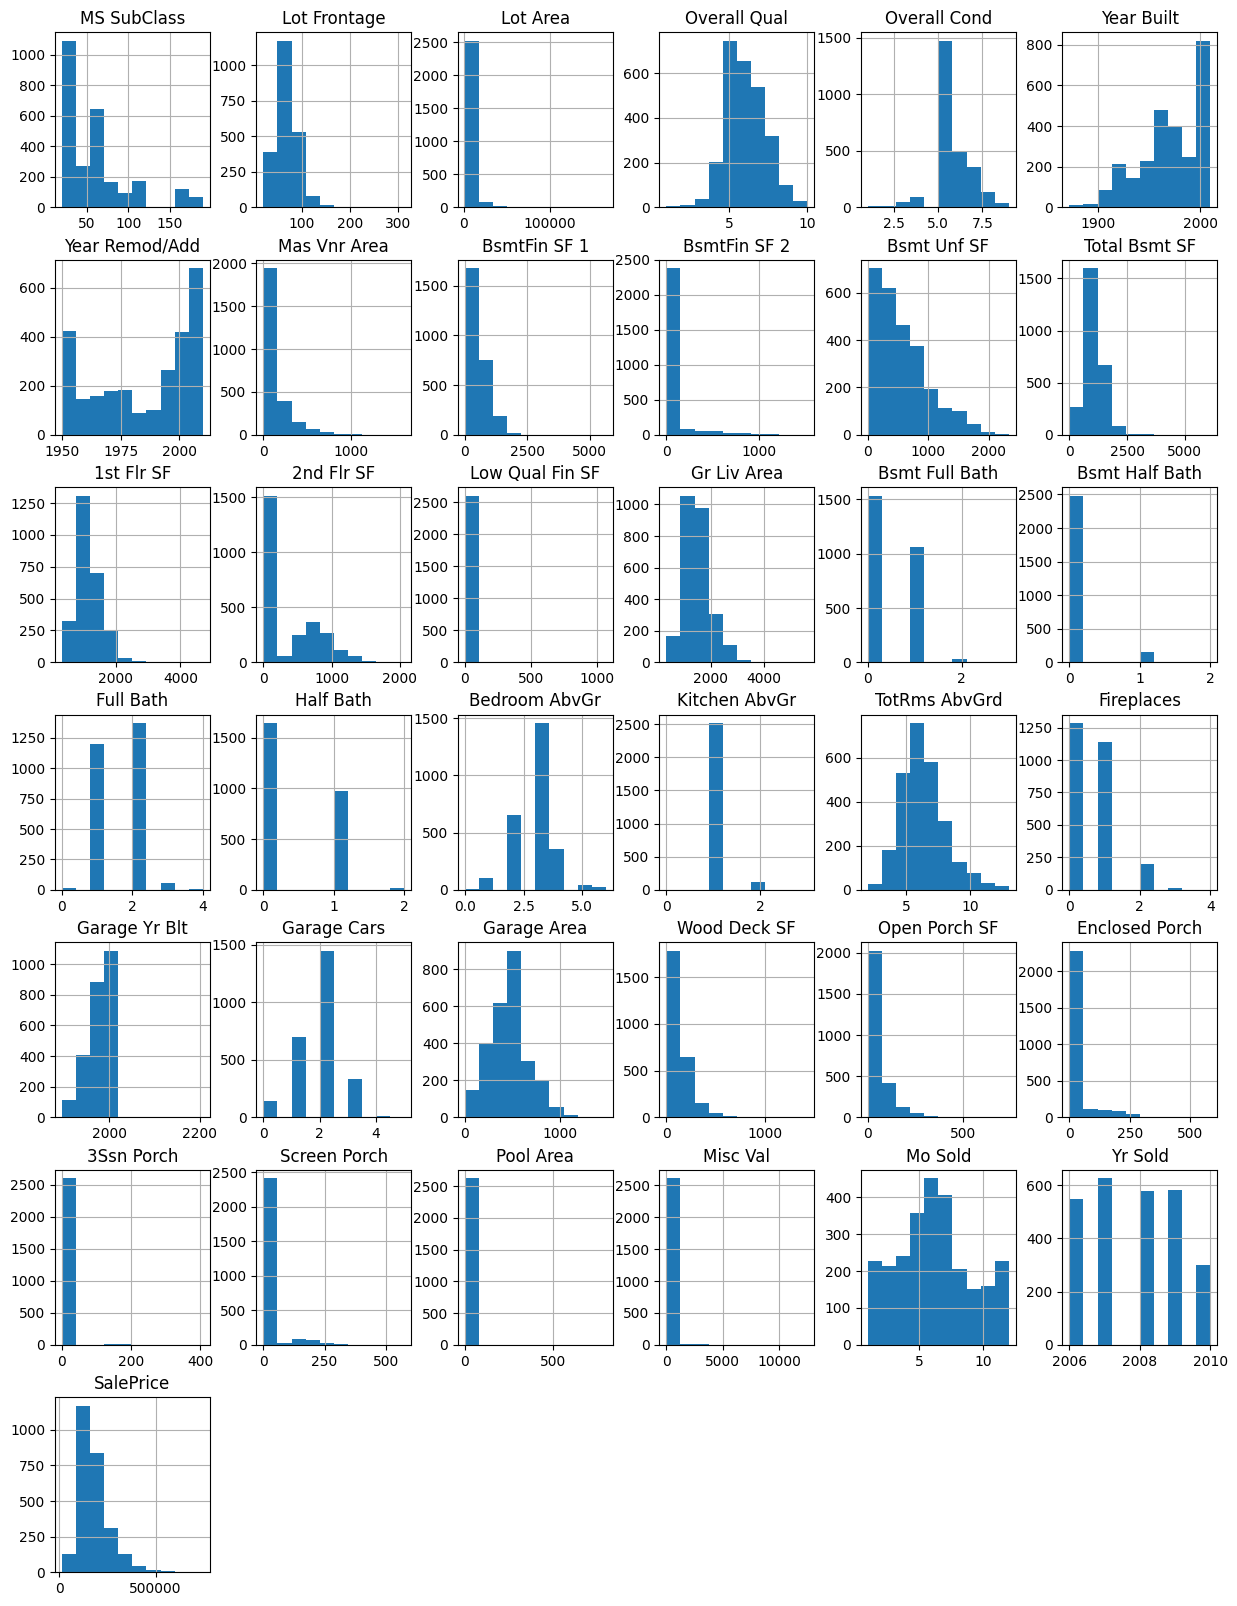

In [121]:

house_df.hist(figsize=(15, 20))
plt.show()


In [122]:
# corr_matrix = housing_data_encoded.corr()  # Replace 'housing_data_encoded' with your DataFrame
corr_matrix = X.corr()


In [123]:
X = house_df_floats.drop(['SalePrice'], axis=1)


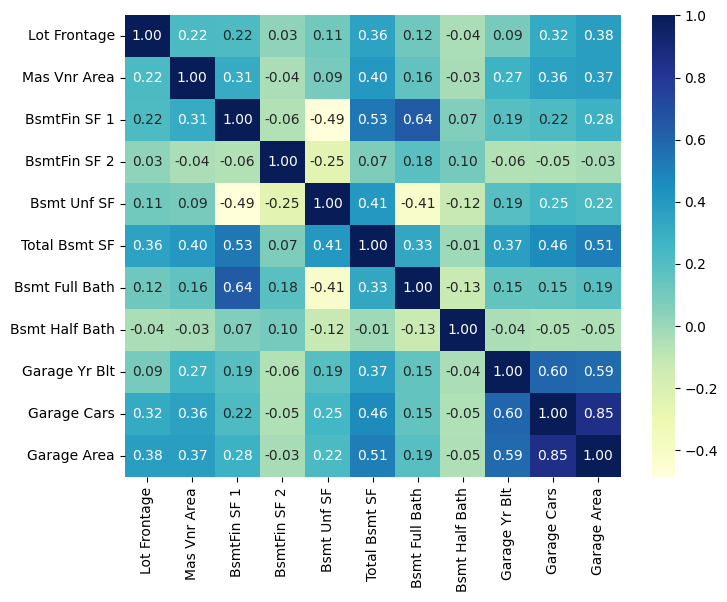

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr()  # استبدال housing_data بـ X الذي يمثل البيانات

plt.figure(figsize=(8, 6))


sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")

plt.show()


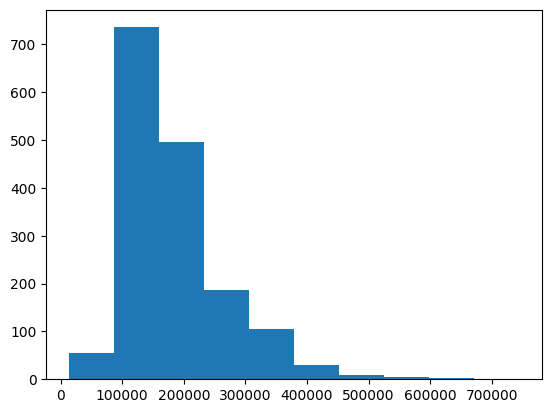

In [125]:
plt.hist(y_train) ;

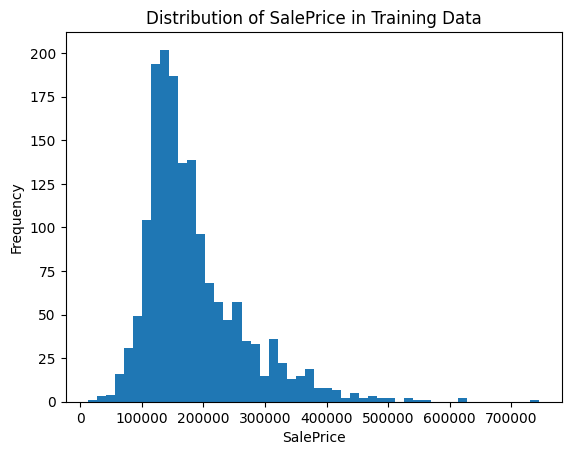

In [126]:
plt.hist(y_train, bins=50)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice in Training Data')
plt.show()


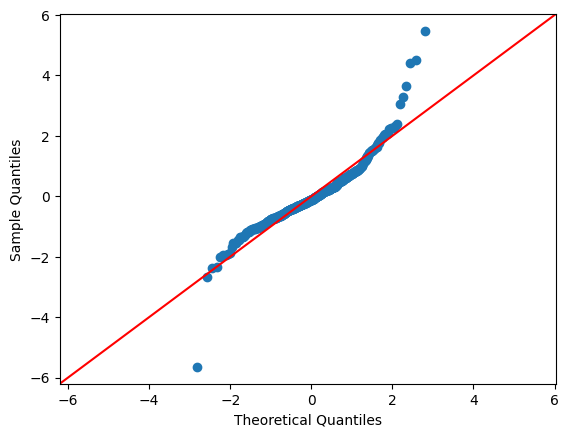

In [127]:
# Assuming you have a fitted model called 'model'
# Calculate residuals (actual values - predicted values)
res = y_test - y_pred  # or alternatively, model.resid if using statsmodels

# Now you can plot the QQ plot
import statsmodels.api as sm
sm.qqplot(res, fit=True, line="45")
plt.show()


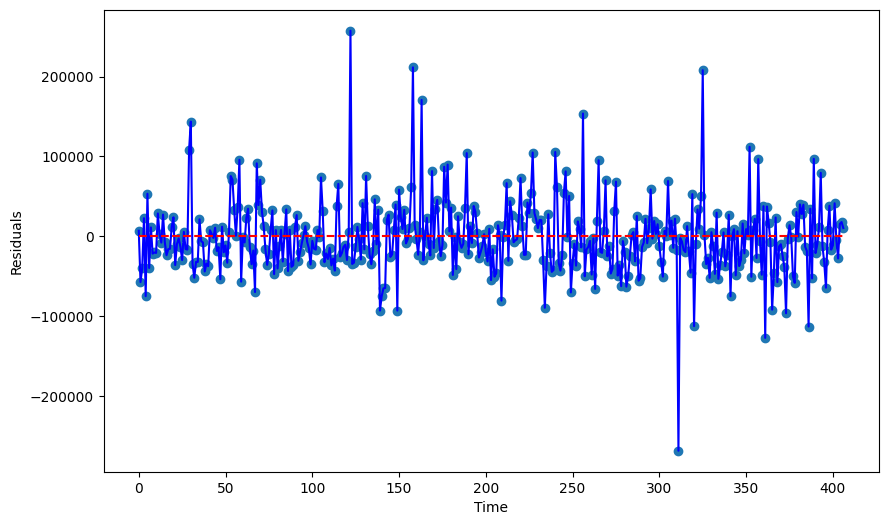

In [128]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

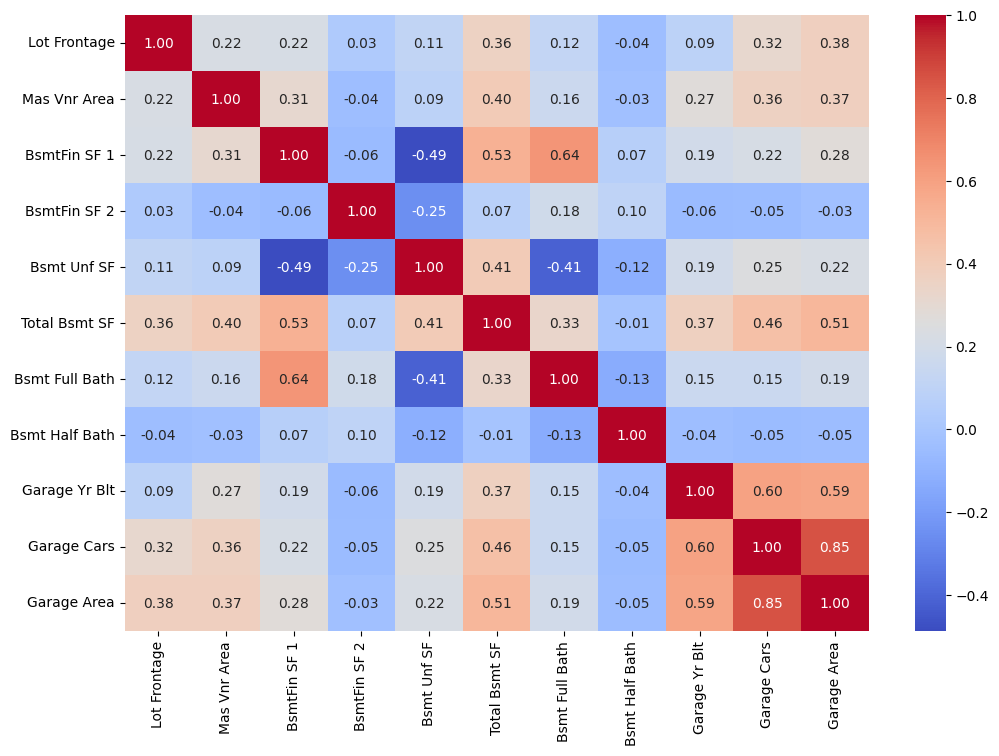

In [129]:
# Drop columns with NaN values before calculating the correlation matrix
X_cleaned = X.dropna(axis=1)

# Now calculate the correlation matrix again
corr_matrix = X_cleaned.corr()

# Visualize the updated correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



In [130]:
# Check for constant columns
constant_columns = [col for col in X.columns if X[col].nunique() == 1]
print(f"Constant columns: {constant_columns}")


Constant columns: []


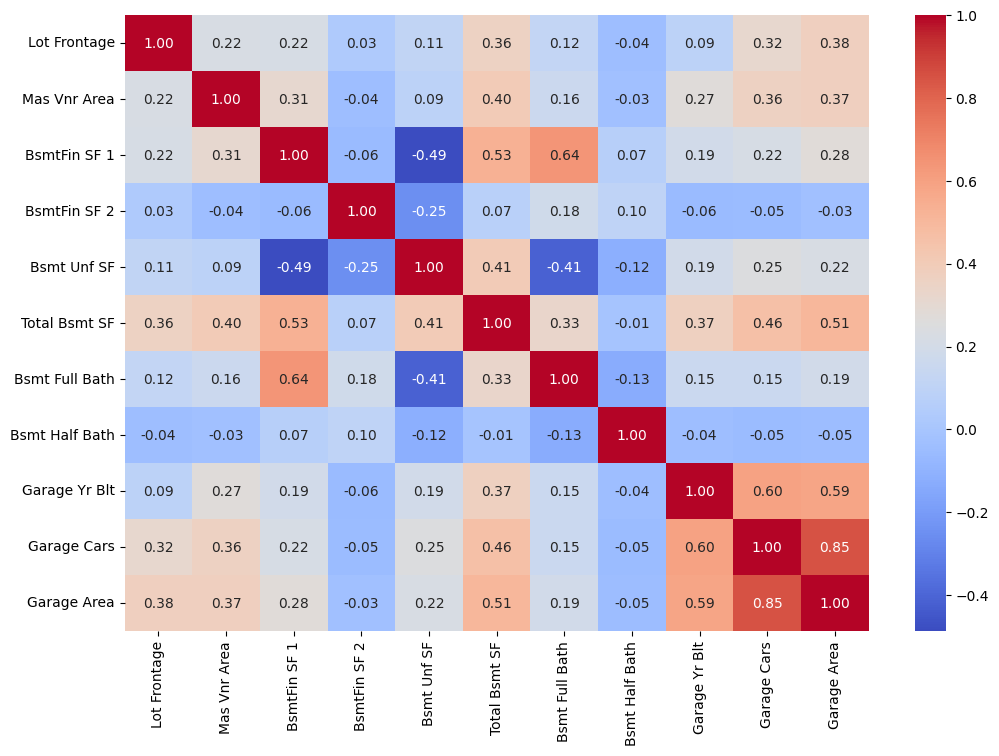

In [131]:
# Reset the index of the DataFrame
X_reset = X.reset_index(drop=True)

# Recalculate the correlation matrix
corr_matrix = X_reset.corr()

# Visualize the updated correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [132]:
print(house_df.columns)


Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [133]:
numerical_cols = house_df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)



Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')


In [134]:
housing_data['MS SubClass'] = housing_data['MS SubClass'].astype(int)


In [135]:
housing_data = pd.get_dummies(housing_data, drop_first=True)


In [136]:
print(housing_data)

Empty DataFrame
Columns: [PID, MS SubClass, Lot Frontage, Lot Area, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, TotRms AbvGrd, Fireplaces, Garage Yr Blt, Garage Cars, Garage Area, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Misc Val, Mo Sold, Yr Sold, SalePrice]
Index: []

[0 rows x 38 columns]


creating categoricol

In [137]:
categorical_columns = X.select_dtypes(include=['object']).columns
print(categorical_columns)

Index([], dtype='object')


In [138]:
X_encoded = pd.get_dummies(X, drop_first=True)
print(X_encoded.head())

   Lot Frontage  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
0          62.0           0.0         513.0         144.0        348.0   
1          72.0           0.0           0.0           0.0          0.0   
2          50.0           0.0           0.0           0.0        780.0   
3          68.0           0.0         484.0           0.0        491.0   
4          60.0           0.0         350.0         210.0          0.0   

   Total Bsmt SF  Bsmt Full Bath  Bsmt Half Bath  Garage Yr Blt  Garage Cars  \
0         1005.0             1.0             0.0         1964.0          2.0   
1            0.0             0.0             0.0         1967.0          2.0   
2          780.0             0.0             0.0         1979.0          1.0   
3          975.0             1.0             0.0         2000.0          2.0   
4          560.0             1.0             0.0         1971.0          2.0   

   Garage Area  
0        440.0  
1        516.0  
2        544.0  
3     

In [139]:
print(X_encoded.shape)
print(y.shape)

(2033, 11)
(0,)


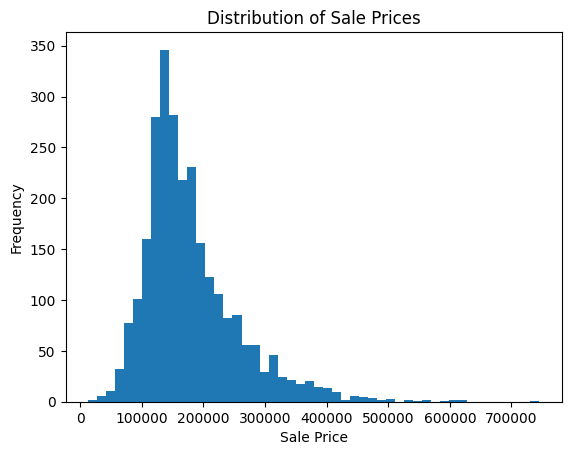

In [140]:
plt.hist(house_df['SalePrice'], bins=50)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


In [141]:
categorical_cols = house_df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


In [142]:
numerical_cols = house_df.select_dtypes(include=[np.number]).columns
print(numerical_cols)


Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')


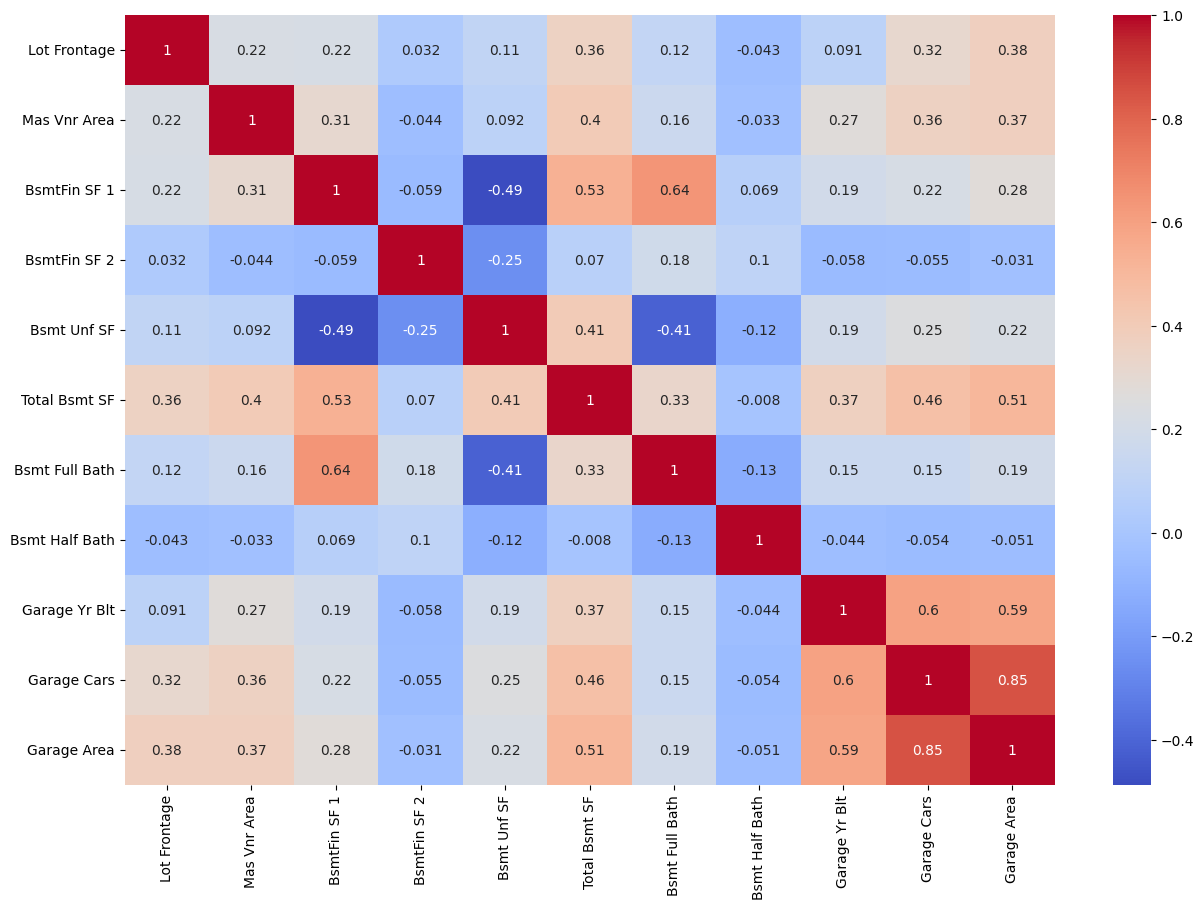

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the size of the figure as necessary
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Creating the heatmap
plt.show()  # Displaying the plot


#**Data Visualiazation**

What plots did you use? What did they show?

I used a scatter plot to compare actual vs predicted house prices, which showed how well the model's predictions matched the real data.
I also used a residual plot to check for any patterns in the prediction errors.

What could/should have been done to improve your performance metric?

I could have tried more advanced models like Random Forest or Gradient Boosting to get better results.
I could have also tuned the model's parameters to improve accuracy.
What constraints did you have while doing this project?

I had limited time and resources, so I couldn’t try many different models or do extensive hyperparameter tuning.
Had you more resources, what else could you have done?

I would have explored more complex models and spent more time fine-tuning the models for better performance.
What are your next steps?

My next steps are to try hyperparameter tuning using GridSearchCV and experiment with more advanced models like XGBoost.


---

#Conclusion




------




In this project, I used Linear Regression to predict house prices based on different features. The model's accuracy was measured using Root Mean Squared Error (RMSE). While the results were good, there is room to improve by trying more advanced models like Random Forest or Gradient Boosting and adjusting settings to get better results.
In general, the project gave helpful insights into how housing features affect prices, with opportunities to make the model even better in the future